In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from causalml.inference.tree import CausalRandomForestRegressor

c:\Users\JATIN PRATAP SINGH\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Failed to import duecredit due to No module named 'duecredit'


In [2]:
df = pd.read_csv("dataset/final_sample.csv")

In [3]:
df[["conversion", "treatment", "visit", "exposure"]].value_counts()

conversion  treatment  visit  exposure
0           1          0      0           47470
1           1          1      1           23031
                              0           13680
0           0          0      0            8700
1           0          1      0            4063
0           1          1      0            1725
                       0      1            1120
                       1      1             671
            0          1      0             314
Name: count, dtype: int64

In [4]:
df.head()

,Unnamed: 0,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,0,12.781566,10.059654,8.215920,1.114982,11.561050,4.115453,-7.011752,4.833815,3.799079,45.054671,5.303177,-0.337358,1,1,1,1
1,1,13.221509,10.059654,8.471764,-1.666396,13.059169,2.230907,-14.476362,9.170324,3.793946,39.917532,5.845456,-0.391661,1,1,1,1
2,2,15.643772,10.059654,8.232822,3.907662,11.029584,4.115453,-1.288207,4.833815,3.858041,34.180688,5.459617,-0.267350,1,1,1,1
3,3,14.617627,10.059654,8.489929,3.907662,13.253813,4.115453,-2.411115,4.833815,3.809530,42.176324,5.737292,-0.560340,1,1,1,0
4,4,20.971668,10.059654,8.638363,4.679882,10.280525,4.115453,-3.282109,4.833815,3.794201,30.046981,5.300375,-0.168679,1,1,1,1


In [5]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [6]:
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.781566,10.059654,8.215920,1.114982,11.561050,4.115453,-7.011752,4.833815,3.799079,45.054671,5.303177,-0.337358,1,1,1,1
1,13.221509,10.059654,8.471764,-1.666396,13.059169,2.230907,-14.476362,9.170324,3.793946,39.917532,5.845456,-0.391661,1,1,1,1
2,15.643772,10.059654,8.232822,3.907662,11.029584,4.115453,-1.288207,4.833815,3.858041,34.180688,5.459617,-0.267350,1,1,1,1
3,14.617627,10.059654,8.489929,3.907662,13.253813,4.115453,-2.411115,4.833815,3.809530,42.176324,5.737292,-0.560340,1,1,1,0
4,20.971668,10.059654,8.638363,4.679882,10.280525,4.115453,-3.282109,4.833815,3.794201,30.046981,5.300375,-0.168679,1,1,1,1


In [7]:
df = df.sample(frac=1)
df.reset_index(drop=True)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,21.905547,10.059654,8.762619,4.679882,10.280525,4.115453,-9.238756,4.833815,3.861910,13.190056,5.300375,-0.168679,0,1,1,0
1,14.219786,10.059654,8.379335,-0.977357,12.841576,4.115453,-13.583126,4.833815,3.770937,40.811160,5.532584,-0.267350,1,1,1,0
2,12.616365,10.059654,8.339800,4.679882,10.280525,4.115453,0.294443,4.833815,3.778339,37.728228,5.300375,-0.168679,1,0,0,0
3,13.642747,10.679513,8.273456,-1.632079,13.059169,2.230907,-16.425655,7.508910,3.807709,39.140336,5.545675,-0.506038,1,1,1,1
4,13.326540,10.059654,8.216603,-1.700105,14.534338,4.115453,-18.140633,4.833815,3.715710,52.155930,5.313566,-0.560340,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100769,12.616365,10.059654,8.214944,4.679882,16.112791,4.115453,0.294443,4.833815,3.670922,58.417478,5.421610,-0.560340,1,1,1,0
100770,23.369437,10.059654,8.214383,4.679882,10.280525,4.115453,-6.359690,4.833815,3.971858,13.190056,5.300375,-0.168679,0,0,0,0
100771,13.907017,10.059654,8.640430,-2.952198,11.029584,4.115453,-15.783371,4.833815,3.830518,39.256426,5.897823,-0.267350,1,1,1,1
100772,26.727568,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0


In [8]:
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
29927,21.905547,10.059654,8.762619,4.679882,10.280525,4.115453,-9.238756,4.833815,3.861910,13.190056,5.300375,-0.168679,0,1,1,0
25571,14.219786,10.059654,8.379335,-0.977357,12.841576,4.115453,-13.583126,4.833815,3.770937,40.811160,5.532584,-0.267350,1,1,1,0
49401,12.616365,10.059654,8.339800,4.679882,10.280525,4.115453,0.294443,4.833815,3.778339,37.728228,5.300375,-0.168679,1,0,0,0
907,13.642747,10.679513,8.273456,-1.632079,13.059169,2.230907,-16.425655,7.508910,3.807709,39.140336,5.545675,-0.506038,1,1,1,1
3239,13.326540,10.059654,8.216603,-1.700105,14.534338,4.115453,-18.140633,4.833815,3.715710,52.155930,5.313566,-0.560340,1,1,1,1


In [9]:
#creating the vectors 
target = df["conversion"].values
treatment = df["treatment"].values
features = df.drop(["conversion", "treatment"], axis=1).values

In [10]:
#creating the model
model = CausalRandomForestRegressor(n_estimators=200)

#fitting the model on the dataset
model.fit(X=features, treatment=treatment, y=target)

CausalRandomForestRegressor(n_estimators=200)

In [11]:
#predicting the individual treatment effects
ITE = model.predict(X=features)

c:\Users\JATIN PRATAP SINGH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\JATIN PRATAP SINGH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\JATIN PRATAP SINGH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\JATIN PRATAP SINGH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\JATIN PRATAP SINGH\AppData\

In [12]:
ITE

array([0.09695618, 0.00242598, 0.02139411, ..., 0.04137027, 0.00188785,
       0.01534641], shape=(100774,))

In [13]:
#creating the final dataframe based on the sample data 
final_df = pd.DataFrame((df[["treatment", "conversion", "exposure"]].values), columns=["treatment", "conversion", "exposure"])

In [14]:
final_df

,treatment,conversion,exposure
0,0,1,0
1,1,1,0
2,1,0,0
3,1,1,1
4,1,1,1
...,...,...,...
100769,1,1,0
100770,0,0,0
100771,1,1,1
100772,1,0,0


In [15]:
#adding the column for ITE values
final_df["ite"] = ITE

In [16]:
final_df

,treatment,conversion,exposure,ite
0,0,1,0,0.096956
1,1,1,0,0.002426
2,1,0,0,0.021394
3,1,1,1,0.007423
4,1,1,1,0.008149
...,...,...,...,...
100769,1,1,0,-0.003385
100770,0,0,0,0.023786
100771,1,1,1,0.041370
100772,1,0,0,0.001888


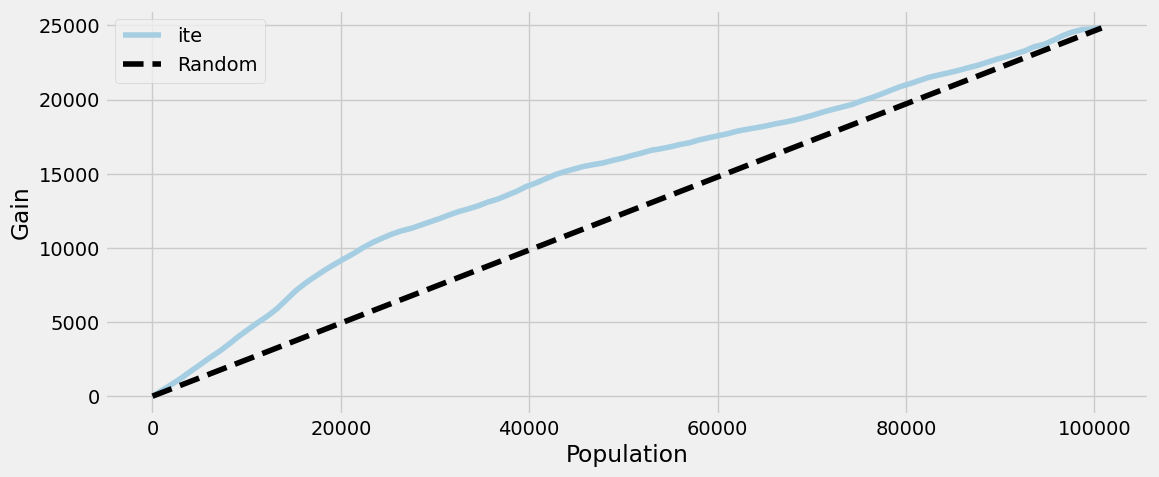

In [17]:
#plotting the gain curve 
from causalml.metrics import plot_gain

plot_gain(df=final_df, outcome_col="conversion", treatment_col="treatment", treatment_effect_col="exposure", figsize=(12, 5))

In [18]:
#saving the trained model
import joblib

joblib.dump(model, "model/model.joblib")

['model/model.joblib']